In [1]:
import sys  
sys.path.insert(0, '../')
from tools.training import make_training, test_on_dataset
from imagenet_models.alexnet import alexnet

import torch.nn as nn
import torch

In [2]:
variation = "original"

In [3]:
net = alexnet(pretrained=False, progress=True, num_classes = 9)
temp_net = alexnet(pretrained=False, progress=True, num_classes = 9)

using cuda



Finished Training
Final acc :  99.90123456790124

Accuracy Graph


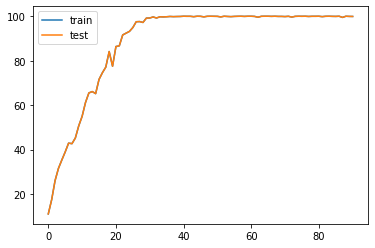


Loss Graph


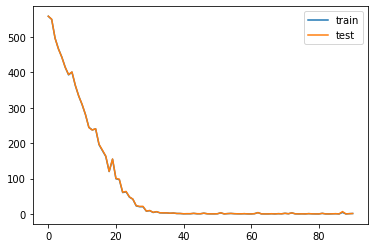


Learning Rate Curve


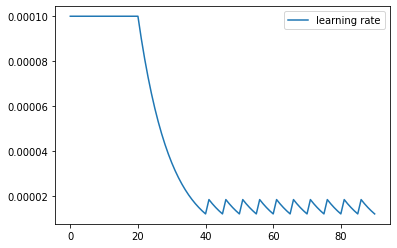

In [4]:
make_training(variation,
              net,
              temp_net,
              n_epoch_first_train = 20,
              n_cycle = 10,
              n_epoch_cycle = 5,
              batch_size = 16,
              workers = 0,
              criterion = nn.CrossEntropyLoss(),
              test_acc_period = 5,
              _print = False)

In [5]:
PATH = "../models/AlexNet_"+ variation + ".pt"
torch.save(net.state_dict(), PATH)

PATH = "../models/AlexNet_cycle"+ variation + ".pt"
torch.save(temp_net.state_dict(), PATH)

In [6]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  99.90123456790124
Accuracy on  mixed_same  :  53.851851851851855
Accuracy on  mixed_next  :  34.592592592592595
Accuracy on  mixed_rand  :  37.135802469135804
Accuracy on  no_fg  :  30.641975308641975
Accuracy on  only_bg_b  :  18.864197530864196
Accuracy on  only_bg_t  :  29.234567901234566
Accuracy on  only_fg  :  30.493827160493826


In [7]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=temp_net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  57.28395061728395
Accuracy on  mixed_next  :  36.839506172839506
Accuracy on  mixed_rand  :  41.135802469135804
Accuracy on  no_fg  :  35.45679012345679
Accuracy on  only_bg_b  :  21.234567901234566
Accuracy on  only_bg_t  :  29.012345679012345
Accuracy on  only_fg  :  37.50617283950617
